In [200]:
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, radius=60, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


## Nash DQN Results

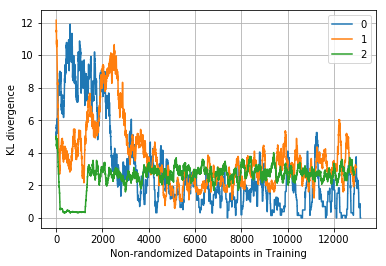

In [209]:
path_prefix = './data/nash_'
kl = np.load(path_prefix+'kl3.npy', allow_pickle=True)
for i, kl4trans in enumerate(kl):
    plt.plot(smooth(np.array(kl4trans)), label=i)
plt.xlabel('Non-randomized Datapoints in Training')
plt.ylabel('KL divergence')
plt.legend()
plt.grid()
plt.savefig(path_prefix+'kl3.pdf')

## Nash DQN with Exploiter Results

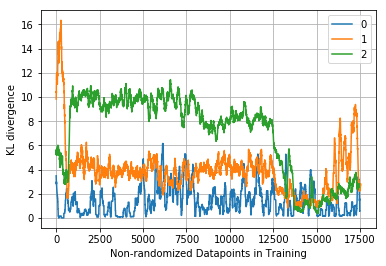

In [210]:
path_prefix = './data/nash_exploiter_'
kl = np.load(path_prefix+'kl3.npy', allow_pickle=True)
for i, kl4trans in enumerate(kl):
    plt.plot(smooth(np.array(kl4trans)), label=i)
plt.xlabel('Non-randomized Datapoints in Training')
plt.ylabel('KL divergence')
plt.legend()
plt.grid()
plt.savefig(path_prefix+'kl3.pdf')